## TÍNH TOÁN VÀ VẼ BIỂU ĐỒ CỦA TƯỚNG VÀ LÕI NÂNG CẤP ĐỂ TRẢ LỜI CÂU HỎI: CÁC CHAMPION TRONG TỪNG TOP 1-> TOP 8 ĐƯỢC SỬ DỤNG VỚI TẦN SUẤT LÀ BAO NHIÊU VÀ VỊ TRÍ TRUNG BÌNH CỦA NÓ LÀ BAO NHIÊU?

#### file notebook chỉ để tính cho tướng (champion) còn lõi nâng cấp thì không được, bởi vì mục đích là trích xuất xử lý thông tin để người chơi có thể hiểu biết hơn về trò chơi nhưng các lõi nâng cấp hiển thị trong trò chơi khác với cách API lưu tên (gần 200 lõi với tên khác hoàn toàn hiển thị trong trò chơi) nên việc xử lý rất là khó khăn

In [1]:
import pandas as pd
import numpy as np
import ast
from itertools import chain
import matplotlib.pyplot as plt
import ast


#### Đọc dữ liệu lấy data về champion

In [2]:
'''
Lọc trùng theo mã trận đấu và danh sách đồ vì:
* Các người chơi sẽ gặp nhau ở các trận đấu nên mã trận đấu sẽ bị trùng giữa các thư mục ngườichơi
* Có 127 trang bị chia thành 4 loại, mỗi champion có tối đa 3 trang bị chưa kể 1 trận có từ 8-10 trang bị và 6-9 champion 
mà mỗi champion có thể để từ 0-3 trang bị nên số trường hợp tối đa là rất lớn mà dữ liệu đầu vào chỉ có 32000 đội hình nên các bộ trang bị
sẽ không thể bị trùng giữa 2 người chơi khác nhau được!
'''
champion_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                      'ID Match', 'List Name Item', 'Champion']).drop_duplicates().reset_index(drop=True)
# champion_df = pd.read_csv('process_data_tft_each_item_csv.csv').drop_duplicates()


In [3]:
champion_df
print(champion_df)


             ID Match                                           Champion  \
0       KR_6267320509  ['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...   
1       KR_6267320509  ['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...   
2       KR_6267320509  ['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...   
3       KR_6267320509  ['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...   
4       KR_6267320509  ['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...   
...               ...                                                ...   
18091  NA1_4523403727  ['TFT8_Blitzcrank', 'TFT8_Renekton', 'TFT8_Vi'...   
18092  NA1_4523403727  ['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...   
18093  NA1_4523403727  ['TFT8_WuKong', 'TFT8_Jax', 'TFT8_Zoe', 'TFT8_...   
18094  NA1_4523403727  ['TFT8_Kayle', 'TFT8_Gangplank', 'TFT8_Fiora',...   
18095  NA1_4523403727  ['TFT8_Fiora', 'TFT8_Vi', 'TFT8_Alistar', 'TFT...   

                                          List Name Item  
0      [['TFT_Item_ZekesHera

#### Lấy ra list Champion trong đội hình của người chơi

In [4]:
list_champions = []
for i in range(len(champion_df['Champion'])):
    list_champions.append(ast.literal_eval(champion_df['Champion'][i]))
list_champions

[['TFT8_Gangplank',
  'TFT8_Vi',
  'TFT8_LeeSin',
  'TFT8_Malphite',
  'TFT8_Ezreal',
  'TFT8_Sona',
  'TFT8_Kaisa'],
 ['TFT8_Lux',
  'TFT8_Annie',
  'TFT8_Yuumi',
  'TFT8_Sona',
  'TFT8_Alistar',
  'TFT8_Ekko',
  'TFT8_Taliyah',
  'TFT8_Syndra'],
 ['TFT8_Galio',
  'TFT8_Nasus',
  'TFT8_Gangplank',
  'TFT8_LeeSin',
  'TFT8_Malphite',
  'TFT8_Yuumi',
  'TFT8_Alistar',
  'TFT8_Nunu'],
 ['TFT8_Fiora',
  'TFT8_Yasuo',
  'TFT8_Vayne',
  'TFT8_Nilah',
  'TFT8_Zoe',
  'TFT8_Leblanc',
  'TFT8_Zed',
  'TFT8_Sejuani'],
 ['TFT8_Lulu',
  'TFT8_Annie',
  'TFT8_Yuumi',
  'TFT8_Sona',
  'TFT8_Alistar',
  'TFT8_Zoe',
  'TFT8_Ekko',
  'TFT8_Soraka'],
 ['TFT8_Talon',
  'TFT8_Blitzcrank',
  'TFT8_Vi',
  'TFT8_Camille',
  'TFT8_Zoe',
  'TFT8_Leblanc',
  'TFT8_Viego',
  'TFT8_Soraka'],
 ['TFT8_Sivir',
  'TFT8_Velkoz',
  'TFT8_Chogath',
  'TFT8_Rammus',
  'TFT8_Rammus',
  'TFT8_Samira',
  'TFT8_AurelionSol',
  'TFT8_Urgot'],
 ['TFT8_Lulu',
  'TFT8_Annie',
  'TFT8_Yuumi',
  'TFT8_Alistar',
  'TFT8_Zoe',
  'T

#### Tìm ra danh sách champion được sử dụng nhiều nhất và ít nhất

ta giảm chiều list_champions lại bằng list(chain.from_iterable)

hàm zip dùng để biến 2 list được cho ra thành key và values

list(chain) dùng để ép mảng xuống còn 1D và sau đó sort lại

sau đó ta rút trích ra được những champion được sử dụng nhiều nhất và ít nhất

In [5]:
def get_best_worst_champions(list_champions):
    print(len(list_champions))
    flatten_list = list(chain.from_iterable(list_champions))

    flatten_list = np.array(flatten_list, dtype = object)

    unique, counts = np.unique(flatten_list, return_counts=True)
    
    a = dict(zip(unique, counts))
    b = dict(sorted(a.items(), key=lambda item: item[1]))

    best_champions = list(b.items())
    worst_champions = list(b.items())
    return best_champions,worst_champions

In [6]:
best_champions,worst_champions = get_best_worst_champions(list_champions)

18096


5 champion được dùng nhiều nhất và ít nhất

In [7]:
print(best_champions[-5:], worst_champions[:5])


[('TFT8_LeeSin', 5151), ('TFT8_Vi', 6196), ('TFT8_Sejuani', 6247), ('TFT8_Ekko', 8228), ('TFT8_Alistar', 8459)] [('TFT8_Poppy', 193), ('TFT8_Sylas', 394), ('TFT8_Draven', 571), ('TFT8_Ashe', 602), ('TFT8_Kayle', 655)]


Biểu đồ sử dụng của các champion đó

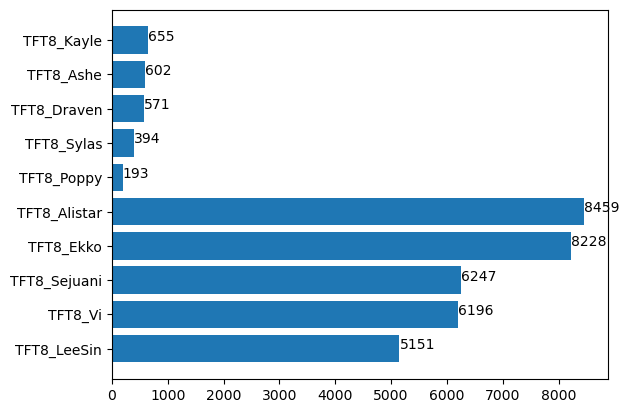

In [8]:
bar_chart = np.array(best_champions[-5:] + worst_champions[0:5])
bar_chart[:, 0]

x = bar_chart[:, 0]
y = bar_chart[:, 1]
y = y.astype('int64')

plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
 
plt.show()

Ta thấy 5 champion ít nhất có số lượng sử dụng cực kì thấp, chỉ bằng khoảng 8% so với champion được dùng nhiều nhất.

#### Vị trí trung bình các champion đó trong trận đấu

In [9]:
average_df = pd.read_csv('../Data/process_data_tft_each_item_csv.csv', usecols=[
                         'ID Match','List Name Item','Champion', 'Placement']).drop_duplicates().reset_index(drop=True)


In [10]:
average_df


,ID Match,Champion,List Name Item,Placement
0,KR_6267320509,"['TFT8_Gangplank', 'TFT8_Vi', 'TFT8_LeeSin', '...","[['TFT_Item_ZekesHerald'], ['TFT_Item_BrambleV...",1
1,KR_6267320509,"['TFT8_Lux', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT8...","[['TFT8_Item_HeartEmblemItem'], ['TFT_Item_Bra...",4
2,KR_6267320509,"['TFT8_Galio', 'TFT8_Nasus', 'TFT8_Gangplank',...","[['TFT_Item_GargoyleStoneplate'], [], ['TFT_It...",7
3,KR_6267320509,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[[], ['TFT8_Item_HackerEmblemItem'], ['TFT_Ite...",2
4,KR_6267320509,"['TFT8_Lulu', 'TFT8_Annie', 'TFT8_Yuumi', 'TFT...","[[], ['TFT_Item_WarmogsArmor', 'TFT_Item_Titan...",5
...,...,...,...,...
18091,NA1_4523403727,"['TFT8_Blitzcrank', 'TFT8_Renekton', 'TFT8_Vi'...","[[], ['TFT_Item_ArchangelsStaff', 'TFT_Item_Je...",6
18092,NA1_4523403727,"['TFT8_Fiora', 'TFT8_Yasuo', 'TFT8_Vayne', 'TF...","[['TFT_Item_TitanicHydra'], ['TFT_Item_ChainVe...",3
18093,NA1_4523403727,"['TFT8_WuKong', 'TFT8_Jax', 'TFT8_Zoe', 'TFT8_...","[[], [], ['TFT8_Item_HeartEmblemItem'], ['TFT_...",2
18094,NA1_4523403727,"['TFT8_Kayle', 'TFT8_Gangplank', 'TFT8_Fiora',...","[[], [], [], [], ['TFT_Item_StatikkShiv', 'TFT...",7


chuyển đổi string sang list nhưng lần này ta để trong hàm để dễ sử dụng và nhìn trực quan hơn

In [11]:
def convert_string_to_list(ok, placement, column):
    temp = ok[ok.eq(placement).any(1)].reset_index(drop=True)
    top = []
    for i in range(len(temp)):
        top.append(ast.literal_eval(temp[column][i]))
    return top


lọc ra trong những top từ 1 đến 8 số lần champion đó được sử dụng. Vòng for để duyệt từng top, sau đó lấy ra số lần sử dụn champion đó

In [12]:
champion_on_top = {}
for i in range(1, 9, 1):
    temp = convert_string_to_list(average_df, i, 'Champion')
    temp1 = 'top_' + str(i)
    champion_on_top[temp1] = get_best_worst_champions(temp)


2262
2262
2262
2262
2262
2262
2262
2262


5 champion tốt nhất và tệ nhất mà người chơi top 1 sử dụng

nếu muốn xem các top khác thì chỉ cần thay đổi string"top_1" thành các top khác

In [13]:
best_champions_top_1, worst_champions_top_1 = champion_on_top['top_1']
print(best_champions_top_1, "\n", worst_champions_top_1)

[('TFT8_Poppy', 12), ('TFT8_Sylas', 41), ('TFT8_Ashe', 48), ('TFT8_Kayle', 59), ('TFT8_Rell', 63), ('TFT8_Draven', 70), ('TFT8_Jinx', 74), ('TFT8_Lulu', 79), ('TFT8_BelVeth', 90), ('TFT8_Lux', 110), ('TFT8_MissFortune', 117), ('TFT8_Talon', 117), ('TFT8_Senna', 120), ('TFT8_AurelionSol', 129), ('TFT8_Camille', 134), ('TFT8_Ezreal', 135), ('TFT8_WuKong', 144), ('TFT8_Fiora', 145), ('TFT8_Sett', 155), ('TFT8_Viego', 155), ('TFT8_Chogath', 179), ('TFT8_Zed', 179), ('TFT8_Yasuo', 187), ('TFT8_Renekton', 195), ('TFT8_Kaisa', 196), ('TFT8_Mordekaiser', 204), ('TFT8_Zac', 206), ('TFT8_Rammus', 211), ('TFT8_Sivir', 221), ('TFT8_Velkoz', 260), ('TFT8_Taliyah', 268), ('TFT8_Vayne', 289), ('TFT8_Nilah', 298), ('TFT8_Samira', 312), ('TFT8_Nasus', 322), ('TFT8_Blitzcrank', 343), ('TFT8_Aphelios', 370), ('TFT8_Annie', 385), ('TFT8_Sona', 385), ('TFT8_Jax', 389), ('TFT8_Leblanc', 417), ('TFT8_Riven', 423), ('TFT8_Syndra', 437), ('TFT8_Zoe', 444), ('TFT8_Galio', 452), ('TFT8_Urgot', 496), ('TFT8_Fiddl

#### TỈ LỆ CỦA CÁC CHAMPION ĐÓ TRONG TRẬN ĐẤU VÀ SỐ LẦN XUẤT HIỆN CỦA CHAMPION TRONG TỪNG TOP CỦA TRẬN ĐẤU

In [14]:
all_champion_df = pd.read_csv("../Data/process_data_champion_tft.csv", usecols=['Champion'])

In [15]:
all_champions = all_champion_df['Champion'].to_list()


champion_avg_top: vị trí trung bình của champ khi ở trong top từ 1 đến 8

Nghĩa là khi champ đó được sử dụng thì trung bình bạn sẽ vào được top mấy

champion_avg_on_match: tỉ lệ số trận đấu từ top 1 đến 8 mà champ đó được sử dụng

Nghĩa là tần suất sử dụng của champ đó trong từng top

In [16]:
sum = 0
temp = 0
champion_avg_top = []
champion_avg_on_match = []
match_each_top = []
for champion in all_champions:
    temp1 = []
    temp2 = []
    for i in range(1, 9, 1):
        cc = dict(champion_on_top['top_' + str(i)][0])

        if(champion in cc):
            temp = temp+dict(champion_on_top['top_' + str(i)][0])[champion]*i
            sum = sum + (dict(champion_on_top['top_' + str(i)][0])[champion])
            
        temp2.append(sum/32000)
        champion_avg_on_match.append(temp2)
    temp1.append(temp/sum)
    champion_avg_top.append(temp1)
    temp = 0
    sum = 0


In [17]:
print(champion_avg_top[0], champion_avg_on_match[0])


[4.26350632462466] [0.0388125, 0.07509375, 0.1094375, 0.14328125, 0.17565625, 0.2071875, 0.23825, 0.26434375]


như ta thấy ở đây, champ đầu tiên sẽ có avg_top là 4.26: nghĩa là nếu sử dụng champ đó thì vị trí trung bình ta sẽ đạt được là 4.26 và avg_on_match là trong từng top 1 -> 8 thì tần suất xuất hiện là bao nhiêu

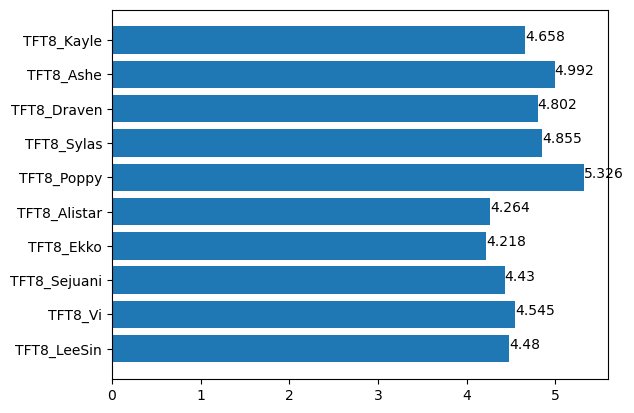

In [18]:
bar_chart[:, 0]
avg_placement_5_worst_best_champions = []
for i in bar_chart[:, 0]:
    avg_placement_5_worst_best_champions.append(
        champion_avg_top[all_champions.index(i)][0])


y = avg_placement_5_worst_best_champions
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value, 3)))

plt.show()


Ta có thể thấy các champion ít sử dụng có vị trí trung bình thấp hơn những champion được sử dụng nhiều nhất, chứng tỏ những champion này chưa thực sự hữu ích dành cho người chơi. Lí do bởi vì những champion này vì những champion này bị out meta

Biểu đồ của 5 champion có vị trí trung bình cao nhất:

In [21]:
ind = np.argpartition(np.array(champion_avg_top), 5, axis=0)[:5]
ind


array([[48],
       [23],
       [45],
       [31],
       [12]], dtype=int64)

In [22]:
name_placement_5_best_champions = []
avg_placement_5_best_champions = []
for i in range(5):
    name_placement_5_best_champions.append(all_champions[ind[i][0]])
    avg_placement_5_best_champions.append(champion_avg_top[ind[i][0]][0])
avg_placement_5_best_champions


[3.572199730094467,
 3.619876774712028,
 3.630266552020636,
 3.645412130637636,
 3.7021654242101527]

In [23]:
y = name_placement_5_best_champions

x = avg_placement_5_best_champions
y = name_placement_5_best_champions
x, y

([3.572199730094467,
  3.619876774712028,
  3.630266552020636,
  3.645412130637636,
  3.7021654242101527],
 ['TFT8_Urgot', 'TFT8_Leona', 'TFT8_Syndra', 'TFT8_Nunu', 'TFT8_Fiddlesticks'])

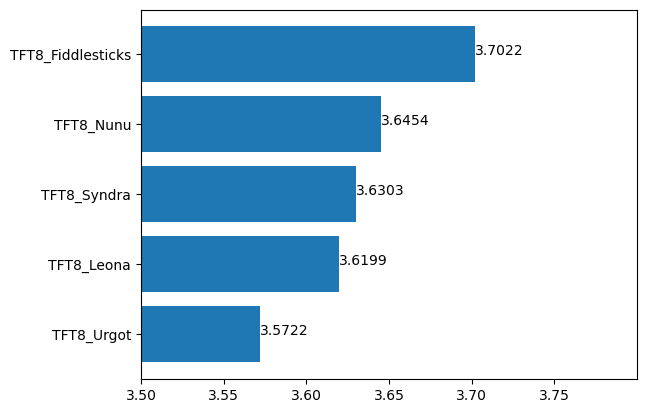

In [24]:
x = name_placement_5_best_champions
y = avg_placement_5_best_champions
fig, ax = plt.subplots()
plt.barh(x, y)
ticks_loc = np.arange(3.5, 3.8, step=0.05)
ax.set_xticks(ticks_loc)
ax.set_xlim(3.5, 3.8)
for index, value in enumerate(y):
    plt.text(value, index,
             str(round(value, 4)))

plt.show()


Đây là những champion có vị trí trung bình cao nhất, dù vị trí trung bình chênh nhau rất nhỏ nhưng với vị trí trung bình cao như vậy thì sự ảnh hưởng của nó tới meta rất lớn